In [ ]:
#Salary Project

In [93]:
import pandas as pd
import numpy as np

In [94]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [95]:
#Finding nan's
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [96]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [97]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [98]:
#Encoding discipline and sex column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe=OneHotEncoder()
ct=make_column_transformer((ohe,['discipline','sex']),remainder='passthrough')
encoded=pd.DataFrame(ct.fit_transform(df),columns=['discipline_B','discipline_A','sex_male','sex_female','rank','yrs.since.phd','yrs.service','salary'])
encoded


,discipline_B,discipline_A,sex_male,sex_female,rank,yrs.since.phd,yrs.service,salary
0,0.0,1.0,0.0,1.0,Prof,19,18,139750
1,0.0,1.0,0.0,1.0,Prof,20,16,173200
2,0.0,1.0,0.0,1.0,AsstProf,4,3,79750
3,0.0,1.0,0.0,1.0,Prof,45,39,115000
4,0.0,1.0,0.0,1.0,Prof,40,41,141500
...,...,...,...,...,...,...,...,...
392,1.0,0.0,0.0,1.0,Prof,33,30,103106
393,1.0,0.0,0.0,1.0,Prof,31,19,150564
394,1.0,0.0,0.0,1.0,Prof,42,25,101738
395,1.0,0.0,0.0,1.0,Prof,25,15,95329


In [99]:
# typecasting object type columns to float data type
encoded['discipline_B']=encoded['discipline_B'].astype('float')
encoded['discipline_A']=encoded['discipline_A'].astype('float')
encoded['sex_male']=encoded['sex_male'].astype('float')
encoded['sex_female']=encoded['sex_female'].astype('float')
encoded['yrs.since.phd']=encoded['yrs.since.phd'].astype('float')
encoded['yrs.service']=encoded['yrs.service'].astype('float')
encoded['salary']=encoded['salary'].astype('float')

In [100]:
#Encoding rank column using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
ord_en=OrdinalEncoder(categories=[['Prof','AssocProf','AsstProf']])
df1=ord_en.fit_transform(encoded[['rank']])
df1
encoded['rank']=df1
encoded.tail()

,discipline_B,discipline_A,sex_male,sex_female,rank,yrs.since.phd,yrs.service,salary
392,1.0,0.0,0.0,1.0,0.0,33.0,30.0,103106.0
393,1.0,0.0,0.0,1.0,0.0,31.0,19.0,150564.0
394,1.0,0.0,0.0,1.0,0.0,42.0,25.0,101738.0
395,1.0,0.0,0.0,1.0,0.0,25.0,15.0,95329.0
396,1.0,0.0,0.0,1.0,2.0,8.0,4.0,81035.0


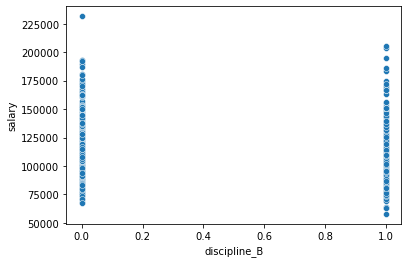

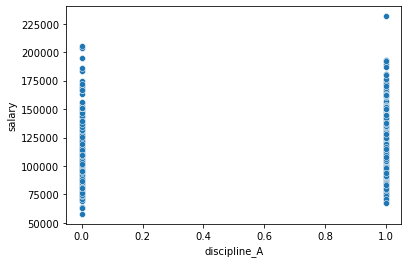

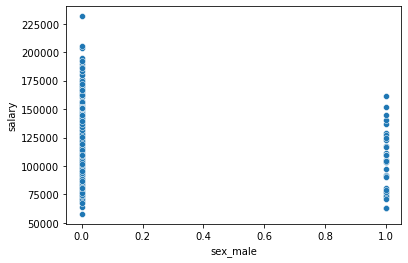

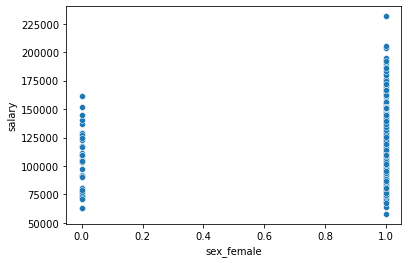

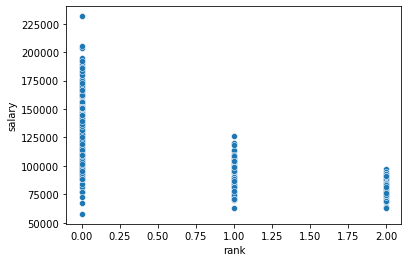

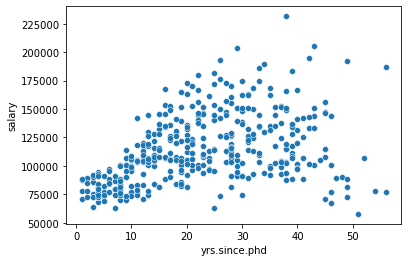

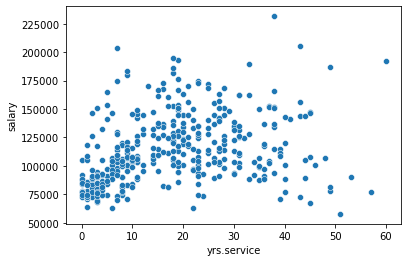

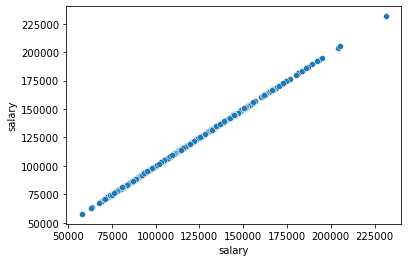

In [101]:
# Exploratory Data Analysis
# Plotting Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
cols=(encoded.columns)
for i in cols:
    a=sns.scatterplot(x=i,y=encoded['salary'],data=encoded)
    plt.xlabel(i)
    plt.ylabel('salary')
    plt.show()

In [85]:
# Analysing correlation between features and between features and label
encoded.corr().abs()

,discipline_B,discipline_A,sex_male,sex_female,rank,yrs.since.phd,yrs.service,salary
discipline_B,1.000000,1.000000,0.003724,0.003724,0.107365,0.218087,0.164599,0.156084
discipline_A,1.000000,1.000000,0.003724,0.003724,0.107365,0.218087,0.164599,0.156084
sex_male,0.003724,0.003724,1.000000,1.000000,0.138556,0.148788,0.153740,0.138610
sex_female,0.003724,0.003724,1.000000,1.000000,0.138556,0.148788,0.153740,0.138610
rank,0.107365,0.107365,0.138556,0.138556,1.000000,0.700950,0.608355,0.617224
yrs.since.phd,0.218087,0.218087,0.148788,0.148788,0.700950,1.000000,0.909649,0.419231
yrs.service,0.164599,0.164599,0.153740,0.153740,0.608355,0.909649,1.000000,0.334745
salary,0.156084,0.156084,0.138610,0.138610,0.617224,0.419231,0.334745,1.000000


<AxesSubplot:>

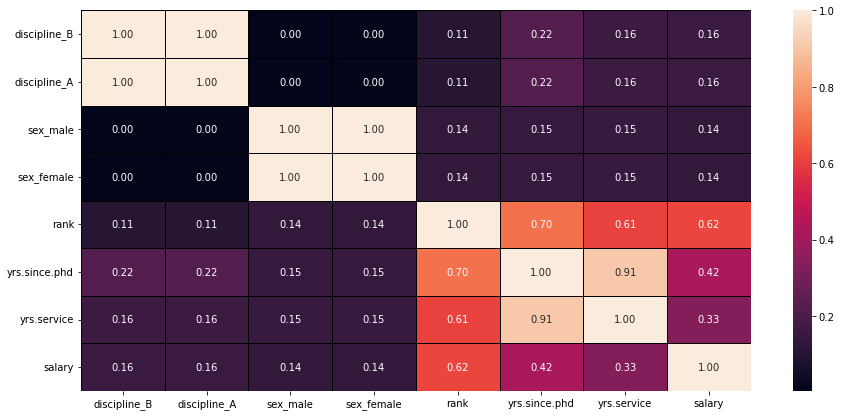

In [102]:
# Analysing correlation using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(encoded.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

In [103]:
#describing data
encoded.describe()

,discipline_B,discipline_A,sex_male,sex_female,rank,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.455919,0.544081,0.098237,0.901763,0.498741,22.314861,17.614610,113706.458438
std,0.498682,0.498682,0.298010,0.298010,0.767472,12.887003,13.006024,30289.038695
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57800.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,7.000000,91000.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,21.000000,16.000000,107300.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,32.000000,27.000000,134185.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,56.000000,60.000000,231545.000000


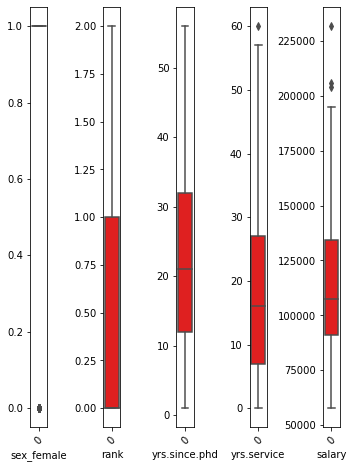

In [104]:
#checking outliers
col_values=encoded.columns.values
nrows=14
ncols=30
plt.figure(figsize=(ncols,3*ncols))
for i in range(3,len(col_values)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=encoded[col_values[i]],color='red',orient='v')
    plt.xlabel(col_values[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

#we could observe outlier in yrs.service, in order to be sure lets check skewness

In [108]:
encoded.skew()

discipline_B     0.177684
discipline_A    -0.177684
sex_male         2.709958
sex_female      -2.709958
rank             1.132759
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

Considering skweness range to be -0.5 to 0.5, we can see above that sex column, rank column and yrs.service columns are skewed so lets be sure of it by plotting distribution graph

In [109]:
import warnings
warnings.filterwarnings('ignore')

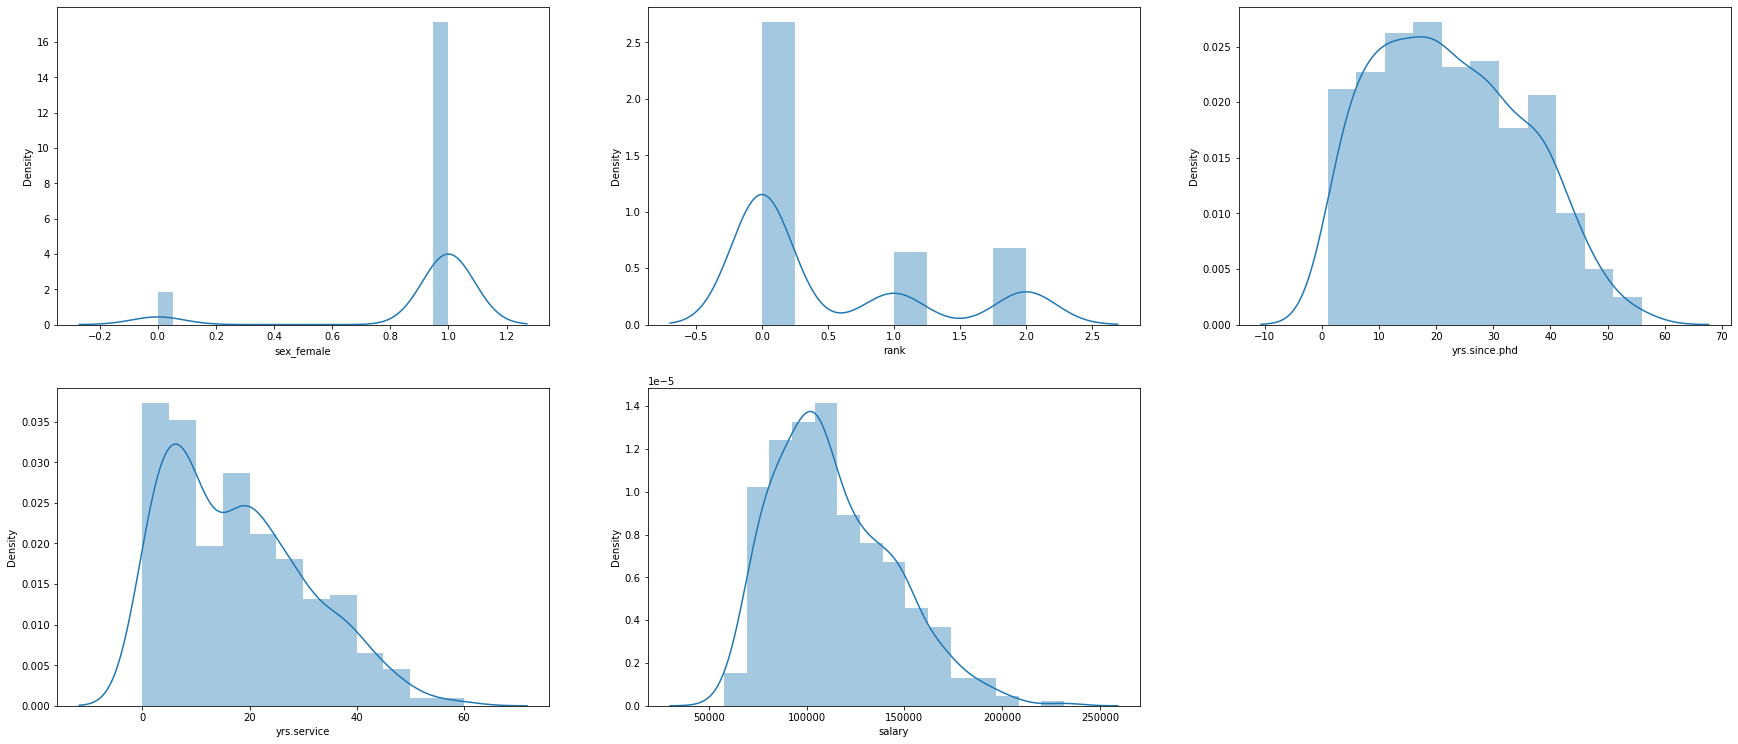

In [110]:
nrows=14
ncols=30
plt.figure(figsize=(ncols,3*ncols))
for i in range(3,len(col_values)):
    plt.subplot(13,3,i+1)
    sns.distplot(encoded[col_values[i]])

# Multicolinearity exists between discipline_b and discipline_A and between sex_male and sex_female and between yrs.since.phd and yrs.service
So if we notice the above scatter plots we could see that discipline either A or B hardly puts same effect on salary and looking at heatmap the relation of discipline column with salary is also least so we will delete these 2 columns. Column sex_male as well as sex_female is also least correlated with salary but looking the scatter plot we could see that if gender is female then the salary is more so we would delete sex_male column and keep sex_female column. Now since the correlation between yrs.sinc.phd and salary is higher then that of yrs.service so we would delete yrs.service to remove the problem of multicolinearity.We will also delete yrs.sevice because it is right skewed and has outliers.


In [142]:
#Creating featues dataframe
x=encoded.drop(['discipline_B','discipline_A','sex_male','yrs.service','salary'],axis=1)

In [160]:
#creating label
y=encoded['salary']

In [162]:
#removing skewness from dataset using yeo-johnson transformation method
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
print(x)


[[ 0.3300584  -0.70177    -0.17067186]
 [ 0.3300584  -0.70177    -0.09324974]
 [ 0.3300584   1.4256125  -1.56814571]
 ...
 [ 0.3300584  -0.70177     1.44244861]
 [ 0.3300584  -0.70177     0.28223037]
 [ 0.3300584   1.4256125  -1.12360035]]


In [153]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.3300584 , -0.70161527, -0.16599264],
       [ 0.3300584 , -0.70161527, -0.08844723],
       [ 0.3300584 ,  1.4603866 , -1.57476209],
       ...,
       [ 0.3300584 , -0.70161527,  1.43737821],
       [ 0.3300584 , -0.70161527,  0.28657314],
       [ 0.3300584 ,  1.4603866 , -1.12510777]])

In [146]:
x.mean()

2.982966984719144e-17

In [195]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=200,test_size=0.20)

In [196]:
#Model building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
predict_train=lr.predict(x_train)
predict_test=lr.predict(x_test)

In [197]:
#checking r2 score of training
from sklearn.metrics import r2_score
print(r2_score(y_train,predict_train))


0.3757338362280993


In [198]:
print(r2_score(y_test,predict_test))

0.4069546718333986
